<a href="https://colab.research.google.com/github/rajagopalmotivate/nano/blob/master/SEM_GOOD2_vgg_Visualizing_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install q keras==2.2.4

Paper https://www.nature.com/articles/sdata2018172

idea 1: auto ml version of sem 

idea 2 : ensemble of inception, vgg, resnet based approach 

idea 3: denoising AE 

idea 4: inpainting to uncover hidden things 



In [0]:
#delete the directory named mynewfiles including its subfolders with the rm -r command 
!rm -r mynewfiles

rm: cannot remove 'mynewfiles': No such file or directory


In [0]:
!mkdir mynewfiles

In [4]:
# source URL for dataset: https://b2share.eudat.eu/records/72758204db9044ab8b3e6b6c4d2eb576

#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Nanowires.tar -O /tmp/dir1.tar

!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Fibres.tar -O /tmp/dir1.tar

--2019-09-12 12:32:30--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Fibres.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446080 (82M) [application/octet-stream]
Saving to: ‘/tmp/dir1.tar’

/tmp/dir1.tar       100%[===================>]  82.44M  62.3MB/s    in 1.3s    

2019-09-12 12:32:31 (62.3 MB/s) - ‘/tmp/dir1.tar’ saved [86446080/86446080]



In [5]:
!ls /tmp


dir1.tar


In [0]:
!ls mynewfiles

In [0]:
!tar xf  /tmp/dir1.tar -C mynewfiles

In [8]:
!ls mynewfiles

Fibres


In [9]:
#count no of files in a directory folder
!ls mynewfiles/Fibres -1 | wc -l


162


In [10]:
!pwd

/content


In [11]:
!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Biological.tar -O /tmp/dir2.tar
  
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Patterned_surface.tar -O /tmp/dir2.tar

--2019-09-12 12:32:53--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Biological.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 709304320 (676M) [application/octet-stream]
Saving to: ‘/tmp/dir2.tar’

/tmp/dir2.tar       100%[===================>] 676.45M  74.8MB/s    in 9.3s    

2019-09-12 12:33:03 (72.7 MB/s) - ‘/tmp/dir2.tar’ saved [709304320/709304320]



In [12]:
!ls /tmp


dir1.tar  dir2.tar


In [0]:
!tar xf  /tmp/dir2.tar -C mynewfiles

In [14]:
!ls mynewfiles

Biological  Fibres


In [15]:
#count no of files in a directory folder
!ls mynewfiles/Biological   -1 | wc -l

972


In [0]:
# Delete a random set of files so that we can experiement fast. delete all files in this folder except keep 150 files
# Good idea to play with 100 files. Once we are confident, we can run the same experiment to 1000 files as it save waiting time for us
!find mynewfiles/Biological -type f -print0 | sort -zR | tail -zn +150 | xargs -0 rm


In [17]:
#count no of files in a directory folder
!ls mynewfiles/Biological   -1 | wc -l

149


In [0]:
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Tips.tar -O /tmp/dir3.tar

In [0]:
#!tar xvf  /tmp/dir3.tar -C mynewfiles

In [0]:
#!ls mynewfiles

#Goal: Just understand the high level concept 
###( let's understand the big picture , don't worry about the coding details right now..)

In [21]:
!ls mynewfiles

Biological  Fibres


In [22]:
!pwd

/content


In [23]:
!ls

mynewfiles  sample_data


In [24]:
import os



rock_dir = os.path.join('mynewfiles/Biological')
paper_dir = os.path.join('mynewfiles/Fibres')
scissors_dir = os.path.join('mynewfiles/Fibres')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 149
total training paper images: 162
total training scissors images: 162
['L7_3dbb68e4a6e9fab2d906c368bc11680b.jpg', 'L7_e720a11357b7ceabe25e5cebb56642da.jpg', 'L7_f1664a67de3cf75961ea8249034d8722.jpg', 'L7_a1e403730aece90984f9b9d8fb724bab.jpg', 'L7_10de35bd099f274a527c83df383eace4.jpg', 'L7_a232b20ddc487b3fbb096149481b4642.jpg', 'L7_68758523bd434994d3e16e12d8babf7a.jpg', 'L7_df5bd0a1dd6f7862bdb864e6908c0e07.jpg', 'L7_82d9406834fb7ee5d8c2fee563117d54.jpg', 'L7_f383c010ec4889081b83b78f6afe79f6.jpg']
['L9_48cd792c544d71915f4dbef758f48196.jpg', 'L9_1371472581d1ca66e006212bb1962dad.jpg', 'L9_cf7ee0985731a88fa47e97e965f7347c.jpg', 'L9_72b3bd17c262ddaa06d8e765b01bbc79.jpg', 'L9_6ce8143217fc3597fab9ed95ad1493d5.jpg', 'L9_1363dda6692fce886bf58de8556d9cfa.jpg', 'L9_da4f677c324c57fc3bf7cdc987633d91.jpg', 'L9_a5d3baf495c7a5db065d3b7b541932c1.jpg', 'L9_34cf6e34ac31698d4518935c037fe92f.jpg', 'L9_00fc0a86bd4f02995acdd5b3f63401b9.jpg']
['L9_48cd792c544d71915f4dbef758f48196

mynewfiles/Biological/L7_3dbb68e4a6e9fab2d906c368bc11680b.jpg
(768, 1024, 3)


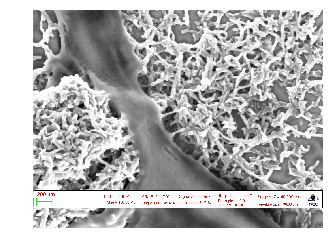

mynewfiles/Biological/L7_e720a11357b7ceabe25e5cebb56642da.jpg
(768, 1024, 3)


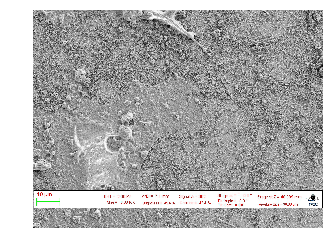

mynewfiles/Fibres/L9_48cd792c544d71915f4dbef758f48196.jpg
(768, 1024, 3)


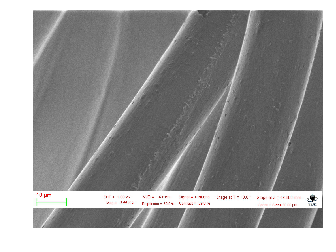

mynewfiles/Fibres/L9_1371472581d1ca66e006212bb1962dad.jpg
(768, 1024, 3)


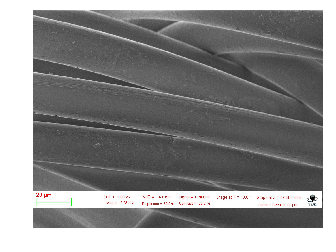

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

#for i, img_path in enumerate(next_rock+next_paper+next_scissors):
for i, img_path in enumerate(next_rock+next_paper):
  #print(img_path)
  img = mpimg.imread(img_path)
  print(img_path)
  print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
SIZE = 150

In [27]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.1, rescale=1./255,      rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=10,
	  class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=10,
	class_mode='categorical'
)




test_datagen = ImageDataGenerator( rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=10,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 281 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 311 images belonging to 2 classes.


In [28]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-09-12 12:33:43--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   134MB/s    in 0.6s    

2019-09-12 12:33:44 (134 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [29]:
from keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(SIZE, SIZE, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

Using TensorFlow backend.


In [30]:
from keras.applications import VGG16

pre_trained_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, 3))



58892288/58889256 [==============================] - 9s 0us/step


In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [32]:
#last_layer = pre_trained_model.get_layer('mixed7')

last_layer = pre_trained_model.get_layer('block5_conv1')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 9, 9, 512)


In [0]:
ispostmixed = False 

for layer in pre_trained_model.layers:
  if layer.name == "mixed6":
    ispostmixed = True
  if ispostmixed == True:
    layer.trainable = True
    print(layer.name)

In [34]:
ispostmixed = False 

for layer in pre_trained_model.layers:
  if layer.name == "block4_conv1":
    ispostmixed = True
  if ispostmixed == True:
    layer.trainable = True
    print(layer.name)

block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [35]:
from keras import layers

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.BatchNormalization() (x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(5000, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(2, activation='softmax')(x)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras import Model
#model = Model(pre_trained_model.input, x)





In [37]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [38]:
last_layer = pre_trained_model.get_layer('block5_pool')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 4, 4, 512)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.BatchNormalization() (x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(5000, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(2, activation='softmax')(x)

In [0]:
from keras import Model
model = Model(pre_trained_model.input, x)

In [41]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [42]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_2    	 	 	 False
2    	 	 	 block1_conv1    	 	 	 False
3    	 	 	 block1_conv2    	 	 	 False
4    	 	 	 block1_pool    	 	 	 False
5    	 	 	 block2_conv1    	 	 	 False
6    	 	 	 block2_conv2    	 	 	 False
7    	 	 	 block2_pool    	 	 	 False
8    	 	 	 block3_conv1    	 	 	 False
9    	 	 	 block3_conv2    	 	 	 False
10    	 	 	 block3_conv3    	 	 	 False
11    	 	 	 block3_pool    	 	 	 False
12    	 	 	 block4_conv1    	 	 	 True
13    	 	 	 block4_conv2    	 	 	 True
14    	 	 	 block4_conv3    	 	 	 True
15    	 	 	 block4_pool    	 	 	 True
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 block5_pool    	 	 	 True
20    	 	 	 flatten_2    	 	 	 True
21    	 	 	 batch_normalization_98    	 	 	 True
22    	 	 	 dense_4    	 	 	 True
23    	 	 	 dropout_3    	 	 	 True
24    	 	 	 batch_normalization_99    	 	 	 True
25    	 	 	 dense_5    	 	 	 True
26    	 	 	 dropout_4    	 	 

In [64]:
history = model.fit_generator(train_generator, epochs=2, validation_data = validation_generator , verbose = 1, steps_per_epoch=10, validation_steps=1)

#model.save("rps.h5")

Epoch 1/2
10/10 [==============================] - 2s 246ms/step - loss: 0.6821 - acc: 0.6962 - val_loss: 0.9464 - val_acc: 0.7000
Epoch 2/2
10/10 [==============================] - 2s 207ms/step - loss: 0.4701 - acc: 0.8700 - val_loss: 0.1648 - val_acc: 1.0000


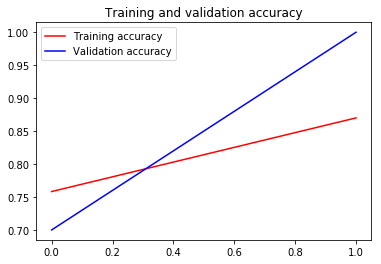

<Figure size 432x288 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
#history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1)


In [0]:
test_generator.reset()


In [46]:
#STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size

import numpy as np

predictions =model.predict_generator(test_generator, steps=100, verbose=1)
print(predictions)

predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]

print(predictionsanswers)


100/100 [==============================] - 16s 160ms/step
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [47]:
filenames=test_generator.filenames

print(filenames)

['Biological/L7_01eef90f5606a68d3ec29940bb53ab23.jpg', 'Biological/L7_041011d404119dcc36b35efcddb2cbc7.jpg', 'Biological/L7_0649bf69285f9390809b02796e1a8b3d.jpg', 'Biological/L7_07f85ea55e83db993b9cbb2f1b6d87df.jpg', 'Biological/L7_0def1a9b82bde34e0dece27581e92b25.jpg', 'Biological/L7_106605d67f32ffd4b0849c60ac2373f2.jpg', 'Biological/L7_10de35bd099f274a527c83df383eace4.jpg', 'Biological/L7_12ef7474941ea4a073b49509de6daf76.jpg', 'Biological/L7_155267e2fb602ab686170b18085d4889.jpg', 'Biological/L7_15c7c897dac620f3406007799e9ea2e0.jpg', 'Biological/L7_174df388c6defb9bbb521ea133678813.jpg', 'Biological/L7_18d8b38ad19606fc7ea2a5a21514eb08.jpg', 'Biological/L7_1ab03d6703d7eb731e0e34df5ac0a3a3.jpg', 'Biological/L7_1b3ab0068876dcc23e728690ee853416.jpg', 'Biological/L7_21eaf00a61ac0c6a4a2aff036040a460.jpg', 'Biological/L7_220f4fb815169cf6e470aaeab95aeece.jpg', 'Biological/L7_26ff640591a3816984adab0e44a70a10.jpg', 'Biological/L7_27bfc074233dc4ef6be84c07b696b845.jpg', 'Biological/L7_2a42db2a7317

In [48]:
len(filenames)

311

In [49]:
for i in range( 300):
 print(predictionsanswers[i] , filenames[i] ) 



Fibres Biological/L7_01eef90f5606a68d3ec29940bb53ab23.jpg
Fibres Biological/L7_041011d404119dcc36b35efcddb2cbc7.jpg
Fibres Biological/L7_0649bf69285f9390809b02796e1a8b3d.jpg
Fibres Biological/L7_07f85ea55e83db993b9cbb2f1b6d87df.jpg
Fibres Biological/L7_0def1a9b82bde34e0dece27581e92b25.jpg
Fibres Biological/L7_106605d67f32ffd4b0849c60ac2373f2.jpg
Fibres Biological/L7_10de35bd099f274a527c83df383eace4.jpg
Fibres Biological/L7_12ef7474941ea4a073b49509de6daf76.jpg
Fibres Biological/L7_155267e2fb602ab686170b18085d4889.jpg
Fibres Biological/L7_15c7c897dac620f3406007799e9ea2e0.jpg
Fibres Biological/L7_174df388c6defb9bbb521ea133678813.jpg
Fibres Biological/L7_18d8b38ad19606fc7ea2a5a21514eb08.jpg
Fibres Biological/L7_1ab03d6703d7eb731e0e34df5ac0a3a3.jpg
Fibres Biological/L7_1b3ab0068876dcc23e728690ee853416.jpg
Fibres Biological/L7_21eaf00a61ac0c6a4a2aff036040a460.jpg
Fibres Biological/L7_220f4fb815169cf6e470aaeab95aeece.jpg
Fibres Biological/L7_26ff640591a3816984adab0e44a70a10.jpg
Fibres Biologi

In [50]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(SIZE, SIZE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

MessageError: ignored

In [0]:
def predictyforaimage(filepath):
  img = image.load_img(filepath, target_size=(SIZE, SIZE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images, batch_size=1)
  print (predictions)




In [0]:
filepath1 = "mynewfiles/Fibres/L9_ee1dc9c124191a5bd7ffc9c2f3e23551.jpg"

predictyforaimage(filepath1)

In [0]:
filepath1 = "mynewfiles/Porous_Sponge/L0_bbaf2aba3f987b75e124f6c06eb6e84a.jpg"
predictyforaimage(filepath1)


In [0]:
filepath1 = "mynewfiles/Fibres/L9_3f42fc660eb039ea7caaddc54fe2b549.jpg"
predictyforaimage(filepath1)



In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np


In [0]:
# The local path to our target image
img_path = "mynewfiles/Biological/L7_36c673ab99189eb2519df5f543365a99.jpg"


# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(SIZE, SIZE))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
preds

In [0]:
np.argmax(preds[0])


In [0]:
african_elephant_output = model.output[:, 0]


In [0]:
african_elephant_output

In [0]:
last_conv_layer = model.get_layer('block5_conv3')


In [0]:
from keras import backend as K


In [0]:
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]


In [0]:
grads.shape

In [0]:
print(grads)

In [0]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))


In [0]:
print(pooled_grads)

In [0]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])


In [0]:
type(iterate)

In [0]:
pooled_grads_value, conv_layer_output_value = iterate([x])


In [0]:
pooled_grads_value

In [0]:
conv_layer_output_value.shape

In [0]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)


In [0]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [0]:

filepath1 = "mynewfiles/Biological/L7_36c673ab99189eb2519df5f543365a99.jpg"
predictyforaimage(filepath1)

In [0]:
filepath2 = "mynewfiles/Films_Coated_Surface/L3_ed7409b9ab4b6c78a57925bea608596d.jpg"
predictyforaimage(filepath2)

In [0]:
for image_batch, label_batch in test_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

In [0]:
result_batch = model.predict(image_batch)
result_batch.shape

In [0]:
predicted_class_names = np.argmax(result_batch, axis=-1)
predicted_class_names

In [0]:
label_batch

In [0]:
np.argmax(label_batch, axis=-1)

In [0]:
ITEMNUMBER = 7

In [0]:
asingleimage = image_batch[ITEMNUMBER]
asingleimage.shape


In [0]:
asingleimage4d = asingleimage.reshape(1, 150, 150, 3)
asingleimage4d.shape

In [0]:
import matplotlib.pyplot as plt

plt.imshow(asingleimage4d[0])
plt.show()



print(predicted_class_names[ITEMNUMBER])
print(np.argmax(label_batch[ITEMNUMBER]))


In [0]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

In [0]:
myinputlayer = 0
for alayer in model.layers:
  if alayer.name=='input_1':
    print(str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable))
    myinputlayer = alayer

print(myinputlayer)

In [0]:
model.save('x.h5')


In [0]:
import keras



In [0]:
from keras.models import load_model


In [0]:
model = load_model('x.h5')

In [0]:
from keras import models

#from tensorflow.compat.v1.keras.models import Model

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
#activation_model = models.Model(inputs=pre_trained_model.input, outputs=layer_outputs)

print( layer_outputs)

print( layer_outputs[0])
print( layer_outputs[15])




In [0]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[15])

In [0]:
activations = activation_model.predict(img_tensor)


In [0]:
activations.shape

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [0]:
import matplotlib.pyplot as plt

plt.matshow(activations[0, :, :, 3], cmap='viridis')
plt.show()

In [0]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[3])

In [0]:
activations = activation_model.predict(img_tensor)


In [0]:
activations.shape

In [0]:
plt.matshow(activations[0, :, :, 3], aspect='auto', cmap='viridis')
plt.show()

In [0]:
plt.matshow(activations[0, :, :, 3], aspect='auto', cmap='viridis')
plt.show()

In [0]:
images_per_row = 16

n_features = layer_activation.shape[-1]

n_features

In [0]:
n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

In [0]:
n_cols



In [0]:
# We'll tile each filter into this big horizontal grid
for col in range(n_cols):
  for row in range(images_per_row):
            channel_image = layer_activation[
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

  # Display the grid
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [0]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[9])

In [0]:
activations = activation_model.predict(img_tensor)


In [0]:
layer_activation = activations[0]

layer_activation.shape

In [0]:
activations.shape

In [0]:
n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [0]:
from keras.applications import VGG16
from keras import backend as K

#model = VGG16(weights='imagenet',              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [0]:
grads = K.gradients(loss, model.input)[0]


In [0]:
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [0]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [0]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

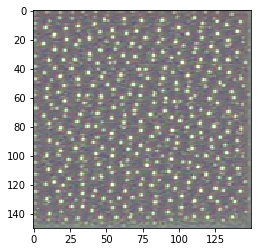

In [73]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [0]:
for layer_name in ['block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

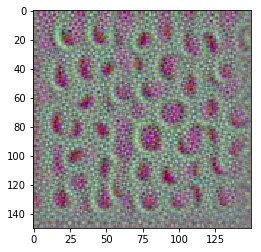

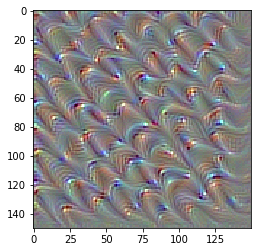

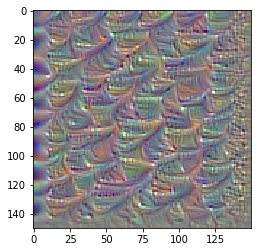

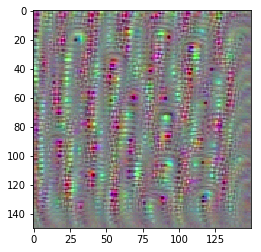

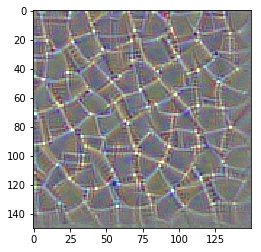

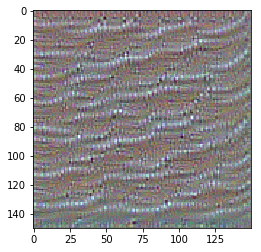

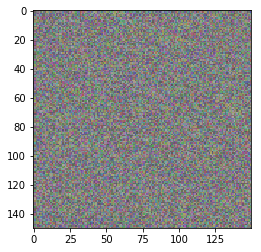

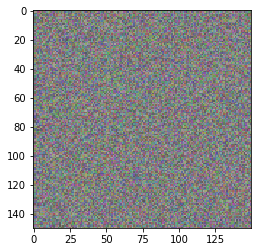

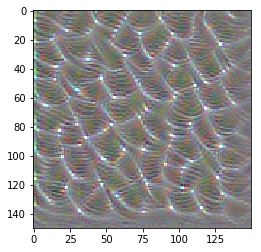

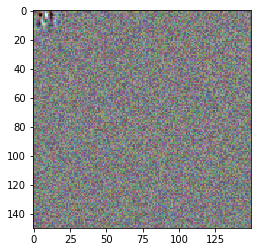

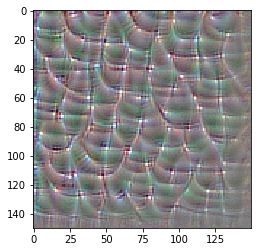

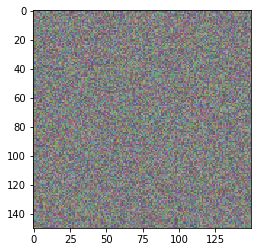

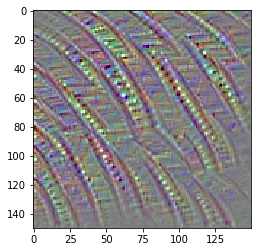

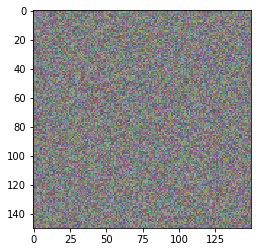

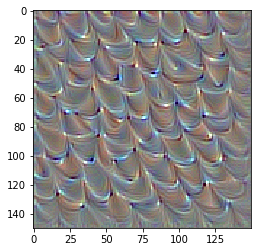

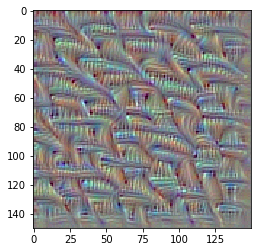

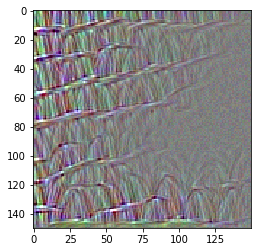

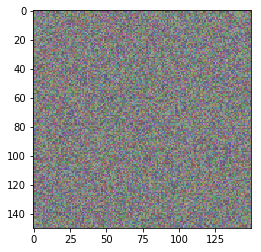

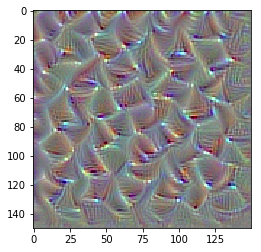

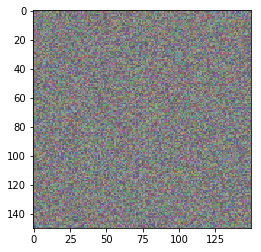

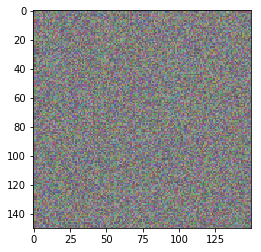

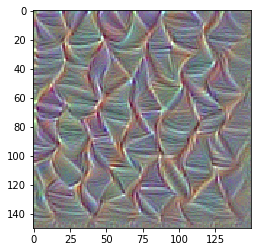

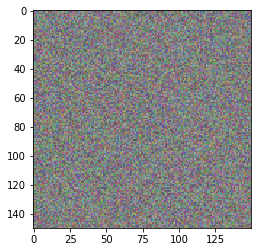

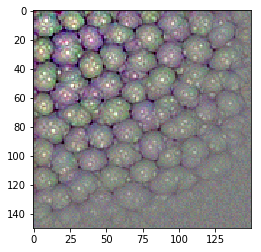

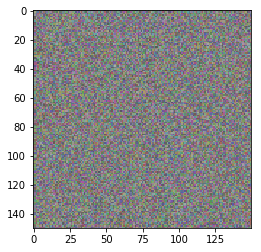

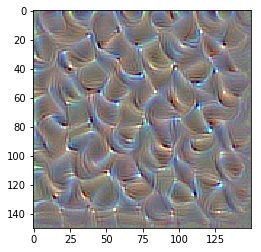

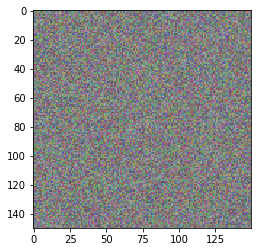

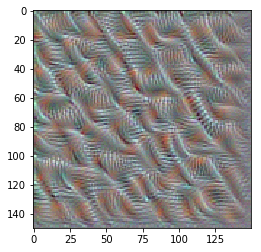

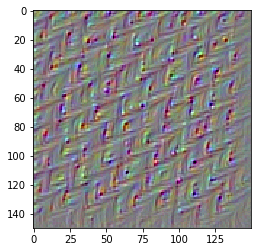

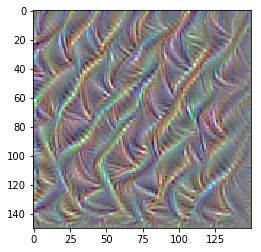

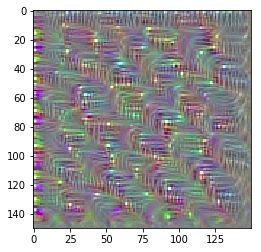

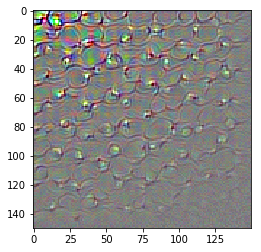

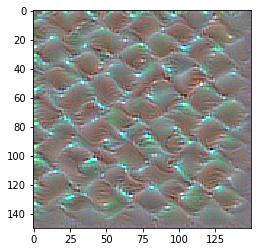

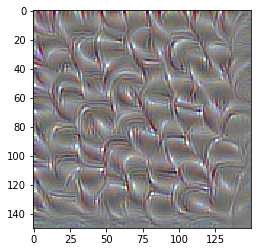

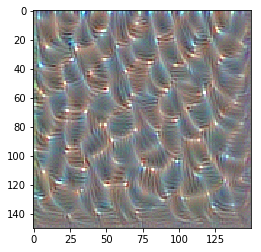

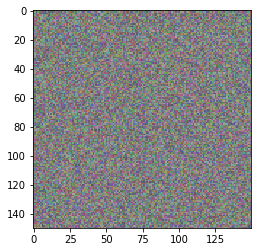

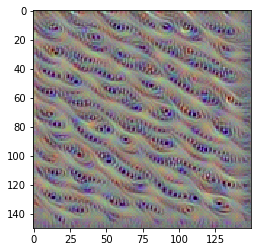

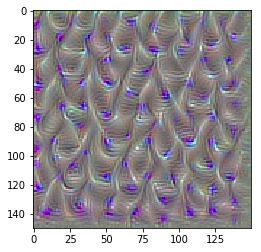

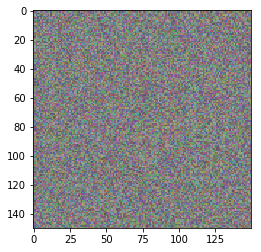

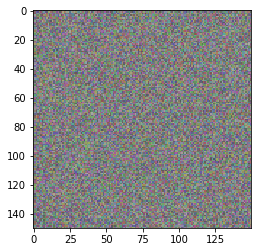

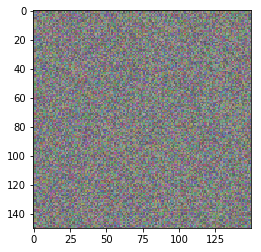

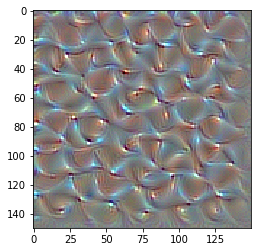

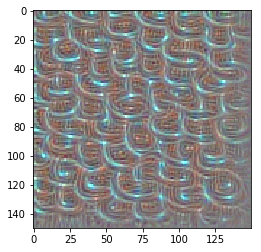

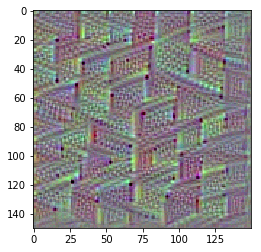

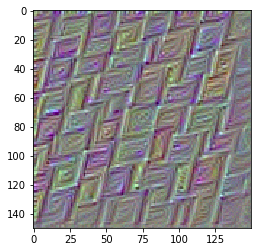

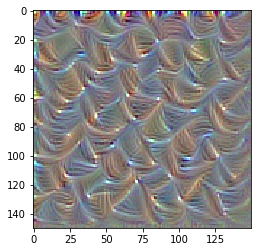

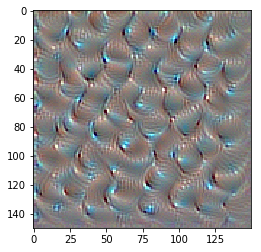

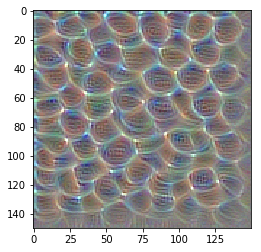

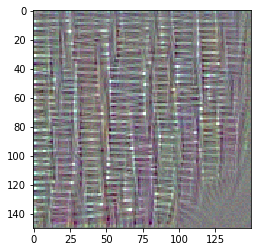

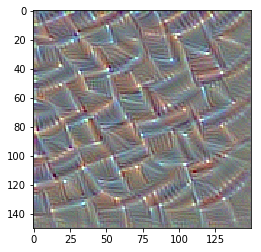

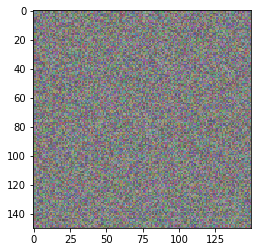

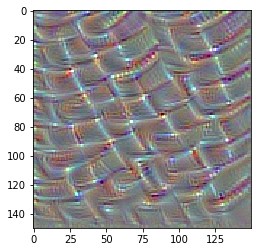

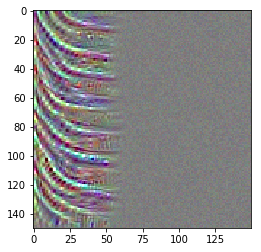

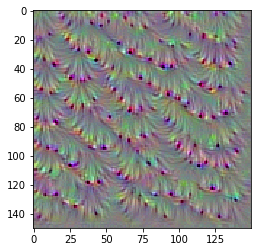

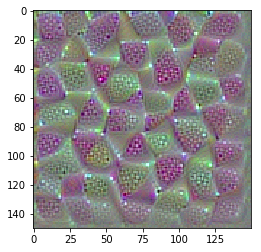

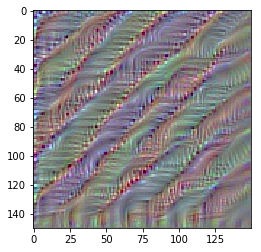

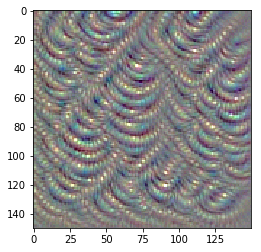

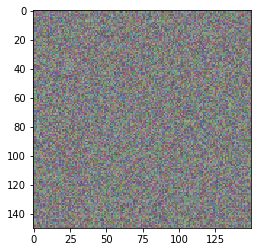

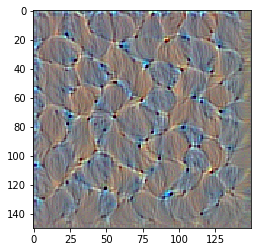

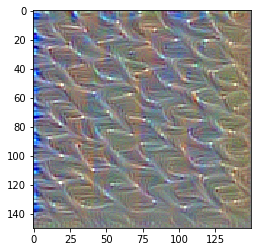

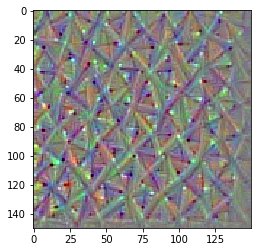

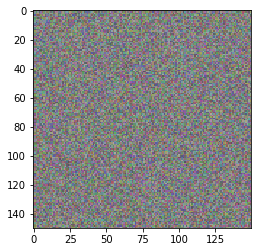

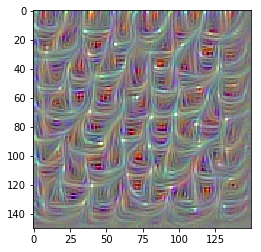

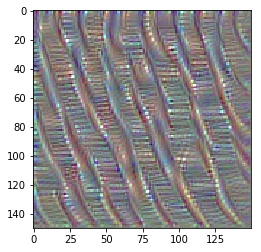

In [76]:
for i in range(64):
  plt.imshow(generate_pattern('block4_conv1', i))
  plt.show()

In [0]:
plt.imshow(generate_pattern('block5_conv3', 4))
plt.show()

In [0]:
for i in range(64):
  plt.imshow(generate_pattern('block4_conv2', i))
  plt.show()

In [0]:
model.save('GOODVisuvalizationx.h5')


In [81]:
from google.colab import files
files.download('GOODVisuvalizationx.h5') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 57542, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil